---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-text-mining/resources/d9pwm) course resource._

---

*Note: Some of the cells in this notebook are computationally expensive. To reduce runtime, this notebook is using a subset of the data.*

# Case Study: Sentiment Analysis

### Data Prep

In [1]:
friends_chars={} 
Rachel=[]
Ross=[]
Joey=[]
Chandler=[]
Phoebe=[]
Monica=[]
with open("transcripts_friends/season_all/merged.csv", "r+") as fp:
    for cnt, line in enumerate(fp):
        #print("Line {}: {}".format(cnt, line))
        if line.startswith('Rachel:'):
            Rachel.append(line[8:])
        elif line.startswith('Ross:'):
            Ross.append(line[6:])
        elif line.startswith('Monica:'):
            Monica.append(line[8:])
        elif line.startswith('Chandler:'):
            Chandler.append(line[10:])
        if line.startswith('Phoebe:'):
            Phoebe.append(line[8:])
        if line.startswith('Joey:'):
            Joey.append(line[6:])

friends_chars['RACHEL']=Rachel
friends_chars['ROSS']=Ross
friends_chars['MONICA']=Monica
friends_chars['PHOEBE']=Phoebe
friends_chars['CHANDLER']=Chandler
friends_chars['JOEY']=Joey



In [2]:
import pandas as pd

df1 = pd.DataFrame(friends_chars['CHANDLER'])
df2 = pd.DataFrame(friends_chars['JOEY'])
df3 = pd.DataFrame(friends_chars['PHOEBE'])
df4 = pd.DataFrame(friends_chars['RACHEL'])
df5 = pd.DataFrame(friends_chars['ROSS'])
df6 = pd.DataFrame(friends_chars['MONICA'])

In [3]:
df1.head()

0
0   You know, I'd love to, but I'm a little tired.\n
1                                       You're on!\n
2  He could be alone. This morning I heard him do...
3                She's cheating on Joey with Ross!\n
4                                             Wow!\n

In [4]:
listOfCharacters1 = ['Chandler'] *df1.shape[0]
listOfCharacters2 = ['Joey'] *df2.shape[0]
listOfCharacters3 = ['Phoebe'] *df3.shape[0]
listOfCharacters4 = ['Rachel'] *df4.shape[0]
listOfCharacters5 = ['Ross'] *df5.shape[0]
listOfCharacters6 = ['Monica'] *df6.shape[0]


In [5]:
df1['Character'] = listOfCharacters1
df2['Character'] = listOfCharacters2 
df3['Character'] = listOfCharacters3
df4['Character'] = listOfCharacters4
df5['Character'] = listOfCharacters5
df6['Character'] = listOfCharacters6


In [6]:
df1=df1.rename(columns={0: 'Dialogue'})
df2=df2.rename(columns={0: 'Dialogue'})
df3=df3.rename(columns={0: 'Dialogue'})
df4=df4.rename(columns={0: 'Dialogue'})
df5=df5.rename(columns={0: 'Dialogue'})
df6=df6.rename(columns={0: 'Dialogue'})

In [7]:
df = pd.concat([df1, df2,df3,df4,df5,df6])
df = df.sample(frac=1).reset_index(drop=True)

df.head()

Dialogue Character
0                          What? Why, why would...\n    Monica
1  So wh..? He's smart, he's qualified. Give me o...    Rachel
2                   Okay.  Okay. (They hug.) Okay.\n      Ross
3                      And she just gave you this?\n      Ross
4                                           What?!\n      Ross

In [8]:
from io import StringIO
col = ['Character', 'Dialogue']
df = df[col]
df = df[pd.notnull(df['Dialogue'])]
df.columns = ['Character', 'Dialogue']
df['category_id'] = df['Character'].factorize()[0]
category_id_df = df[['Character', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Character']].values)
df.head(20)


Character                                           Dialogue  category_id
0     Monica                          What? Why, why would...\n            0
1     Rachel  So wh..? He's smart, he's qualified. Give me o...            1
2       Ross                   Okay.  Okay. (They hug.) Okay.\n            2
3       Ross                      And she just gave you this?\n            2
4       Ross                                           What?!\n            2
5       Ross                                      Yeah, okay.\n            2
6     Rachel             We are so gonna find them this year.\n            1
7     Rachel                                    Was she good?\n            1
8     Rachel  Well, I-I-I’ve been on Standby for a flight ho...            1
9   Chandler  But we are not the one she chose! How can you ...            3
10    Monica           (joining him) Wow! She is pretty, huh?\n            0
11  Chandler                                     What...? NO!\n            3
12    Rachel                           Well why shouldn’t I?!\n            1
13      Joey  Oh yeah? (Puts the hat on.) If you’re gonna ma...            4
14  Chandler   And yet, she’s still not hanging up the phone.\n            3
15      Ross                                    You're crazy.\n            2
16      Joey  (now laughing a little) Dude, I really don't t...            4
17      Joey  Uh, waiter, one more plate of chicken wings ov...            4
18  Chandler  Well uh, Archie needs money to fix his jalopy ...            3
19    Phoebe                              Those are my shoes.\n            5

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt


In [1]:
import re
from nltk.corpus import stopwords


df = df.reset_index(drop=True)
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
    text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
df['Dialogue'] = df['Dialogue'].apply(clean_text)
df['Dialogue'] = df['Dialogue'].str.replace('\d+', '')
df.head()

NameError: name 'df1' is not defined

In [25]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


Using TensorFlow backend.


In [37]:

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 120
# This is fixed.
EMBEDDING_DIM = 128
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['Dialogue'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))
word_index

Found 15971 unique tokens.


{'oh': 1,
 'im': 2,
 'okay': 3,
 'yeah': 4,
 'know': 5,
 'dont': 6,
 'well': 7,
 'hey': 8,
 'right': 9,
 'like': 10,
 'gonna': 11,
 'get': 12,
 'youre': 13,
 'thats': 14,
 'really': 15,
 'go': 16,
 'ross': 17,
 'yknow': 18,
 'think': 19,
 'look': 20,
 'joey': 21,
 'one': 22,
 'uh': 23,
 'chandler': 24,
 'mean': 25,
 'got': 26,
 'monica': 27,
 'see': 28,
 'rachel': 29,
 'god': 30,
 'want': 31,
 'come': 32,
 'good': 33,
 'cant': 34,
 'guys': 35,
 'back': 36,
 'going': 37,
 'phoebe': 38,
 'would': 39,
 'sorry': 40,
 'great': 41,
 'little': 42,
 'say': 43,
 'didnt': 44,
 'yes': 45,
 'tell': 46,
 'hi': 47,
 'time': 48,
 'ok': 49,
 'hes': 50,
 'could': 51,
 'something': 52,
 'shes': 53,
 'ill': 54,
 'love': 55,
 'thing': 56,
 'guy': 57,
 'wait': 58,
 'us': 59,
 'said': 60,
 'make': 61,
 'maybe': 62,
 'way': 63,
 'take': 64,
 'umm': 65,
 'looks': 66,
 'still': 67,
 'sure': 68,
 'never': 69,
 'wanna': 70,
 'whats': 71,
 'starts': 72,
 'much': 73,
 'ive': 74,
 'thank': 75,
 'wow': 76,
 'two': 7

In [54]:
X = tokenizer.texts_to_sequences(df['Dialogue'].values)#df['Dialogue']#tokenizer.texts_to_sequences(df['Dialogue'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)
X

Shape of data tensor: (99233, 120)


array([[   0,    0,    0, ...,    0,    0,   39],
       [   0,    0,    0, ...,  465,  515,  208],
       [   0,    0,    0, ...,    3,  268,    3],
       ...,
       [   0,    0,    0, ...,  802, 1665,  234],
       [   0,    0,    0, ...,  820,    1,    3],
       [   0,    0,    0, ...,    0,  169,  169]], dtype=int32)

In [55]:
Y = pd.get_dummies(df['category_id']).values#df['category_id']
#print('Shape of label tensor:', Y.shape)
Y

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0]], dtype=uint8)

In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 0)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(66486, 120) (66486, 6)
(32747, 120) (32747, 6)


In [57]:
X_test


array([[    0,     0,     0, ...,  1235,    16,   265],
       [    0,     0,     0, ...,     9,    14, 12394],
       [    0,     0,     0, ...,    23,  4961,  3787],
       ...,
       [    0,     0,     0, ...,   622,    42,   806],
       [    0,     0,     0, ...,   436,    10,  1802],
       [    0,     0,     0, ...,   155,  9546,    85]], dtype=int32)

In [58]:
Y_test

array([[0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0],
       ...,
       [0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1]], dtype=uint8)

In [59]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [60]:
X.shape[1]

120

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model1.add(tf.keras.layers.SpatialDropout1D(0.2))
model1.add(tf.keras.layers.LSTM(500, dropout=0.2, recurrent_dropout=0.2))
model1.add(tf.keras.layers.Dense(6, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model1.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 583s 10ms/sample - loss: 1.7023 - accuracy: 0.2792 - val_loss: 1.6026 - val_accuracy: 0.3501
Epoch 2/10
59837/59837 [==============================] - 579s 10ms/sample - loss: 1.4304 - accuracy: 0.4402 - val_loss: 1.4926 - val_accuracy: 0.4113
Epoch 3/10
59837/59837 [==============================] - 595s 10ms/sample - loss: 1.2314 - accuracy: 0.5213 - val_loss: 1.4322 - val_accuracy: 0.4449
Epoch 4/10
59837/59837 [==============================] - 613s 10ms/sample - loss: 1.1029 - accuracy: 0.5665 - val_loss: 1.3920 - val_accuracy: 0.4784
Epoch 5/10
59837/59837 [==============================] - 591s 10ms/sample - loss: 1.0202 - accuracy: 0.5964 - val_loss: 1.3899 - val_accuracy: 0.4932
Epoch 6/10
59837/59837 [==============================] - 579s 10ms/sample - loss: 0.9593 - accuracy: 0.6176 - val_loss: 1.4033 - val_accuracy: 0.5032
Epoch 7/10
59837/59837 [=====================

In [66]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(6, activation='sigmoid')
])

model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 10
batch_size = 64

history = model2.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Train on 59837 samples, validate on 6649 samples
Epoch 1/10
59837/59837 [==============================] - 198s 3ms/sample - loss: 1.7032 - accuracy: 0.2711 - val_loss: 1.6111 - val_accuracy: 0.3426
Epoch 2/10
59837/59837 [==============================] - 198s 3ms/sample - loss: 1.4087 - accuracy: 0.4494 - val_loss: 1.4709 - val_accuracy: 0.4304
Epoch 3/10
59837/59837 [==============================] - 197s 3ms/sample - loss: 1.1646 - accuracy: 0.5465 - val_loss: 1.4132 - val_accuracy: 0.4704
Epoch 4/10
59837/59837 [==============================] - 195s 3ms/sample - loss: 1.0295 - accuracy: 0.5932 - val_loss: 1.4208 - val_accuracy: 0.4850
Epoch 5/10
59837/59837 [==============================] - 194s 3ms/sample - loss: 0.9520 - accuracy: 0.6192 - val_loss: 1.4466 - val_accuracy: 0.5047
Epoch 6/10
59837/59837 [==============================] - 196s 3ms/sample - loss: 0.8937 - accuracy: 0.6404 - val_loss: 1.4991 - val_accuracy: 0.5089


In [68]:
accr = model1.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

32747/32747 [==============================] - 237s 7ms/sample - loss: 1.4258 - accuracy: 0.5197
Test set
  Loss: 1.426
  Accuracy: 0.520


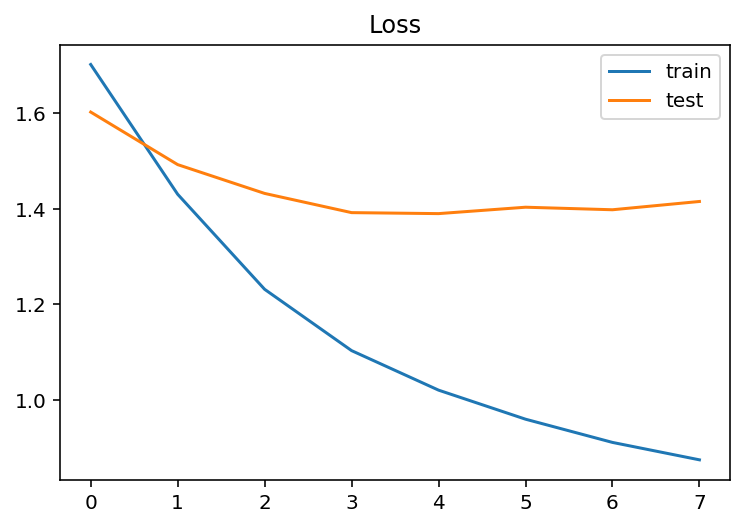

In [69]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [74]:
#model = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
#"model.fit(X_train, y_train)
# X_test = X_test.reshape(X_test.shape[1:])
# X_test=X_test.transpose()
y_pred = model1.predict(X_test)
y_pred



array([[5.1484233e-01, 2.0498852e-01, 4.3578554e-02, 5.0007179e-02,
        4.7631469e-02, 1.3895202e-01],
       [5.1293444e-02, 3.9686468e-01, 6.9660023e-02, 1.7039900e-01,
        2.3187052e-01, 7.9912312e-02],
       [1.0846701e-05, 9.9981374e-01, 9.6063421e-05, 7.8334460e-06,
        6.2208564e-05, 9.2685577e-06],
       ...,
       [1.3623328e-03, 6.2003848e-03, 9.8627895e-01, 4.6858052e-03,
        1.4507388e-03, 2.1916167e-05],
       [9.9826509e-01, 5.5705277e-05, 1.6509722e-03, 2.4822880e-06,
        1.5803486e-06, 2.4273206e-05],
       [6.4154010e-06, 6.5570989e-06, 3.4110985e-06, 2.2708873e-05,
        5.8220990e-05, 9.9990273e-01]], dtype=float32)

In [85]:
import numpy as np
probas = np.array(y_pred)
y_pred = np.argmax(probas, axis=-1)    
print(y_pred)

[0 1 1 ... 2 0 5]


In [86]:
Y_test = np.array(Y_test)
Y_test = np.argmax(Y_test, axis=-1)    
print(Y_test)

[4 3 1 ... 2 0 5]


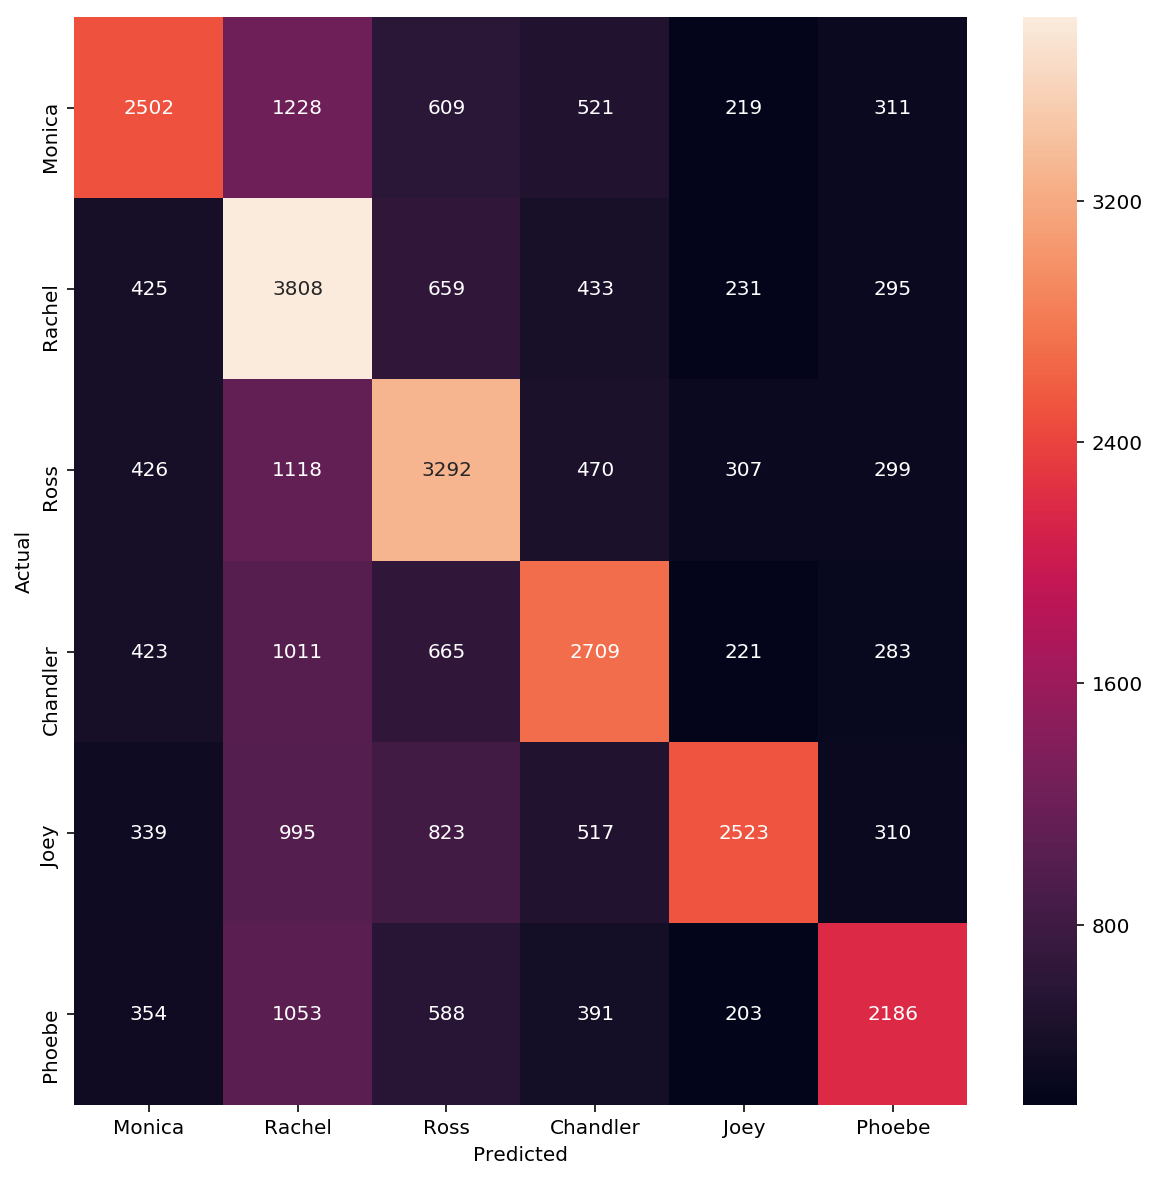

In [87]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_mat = confusion_matrix(Y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Character.values, yticklabels=category_id_df.Character.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


In [94]:
from sklearn import metrics
print(metrics.classification_report(Y_test, y_pred, target_names=df['Character'].unique()))

              precision    recall  f1-score   support

      Monica       0.56      0.46      0.51      5390
      Rachel       0.41      0.65      0.51      5851
        Ross       0.50      0.56      0.52      5912
    Chandler       0.54      0.51      0.52      5312
        Joey       0.68      0.46      0.55      5507
      Phoebe       0.59      0.46      0.52      4775

    accuracy                           0.52     32747
   macro avg       0.55      0.52      0.52     32747
weighted avg       0.54      0.52      0.52     32747

